<a href="https://colab.research.google.com/github/anoojtk/python-correlation/blob/main/correlation_and_lr_eg_27_04_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/winequality-red_(2).csv')

In [ ]:
data.shape

(1599, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


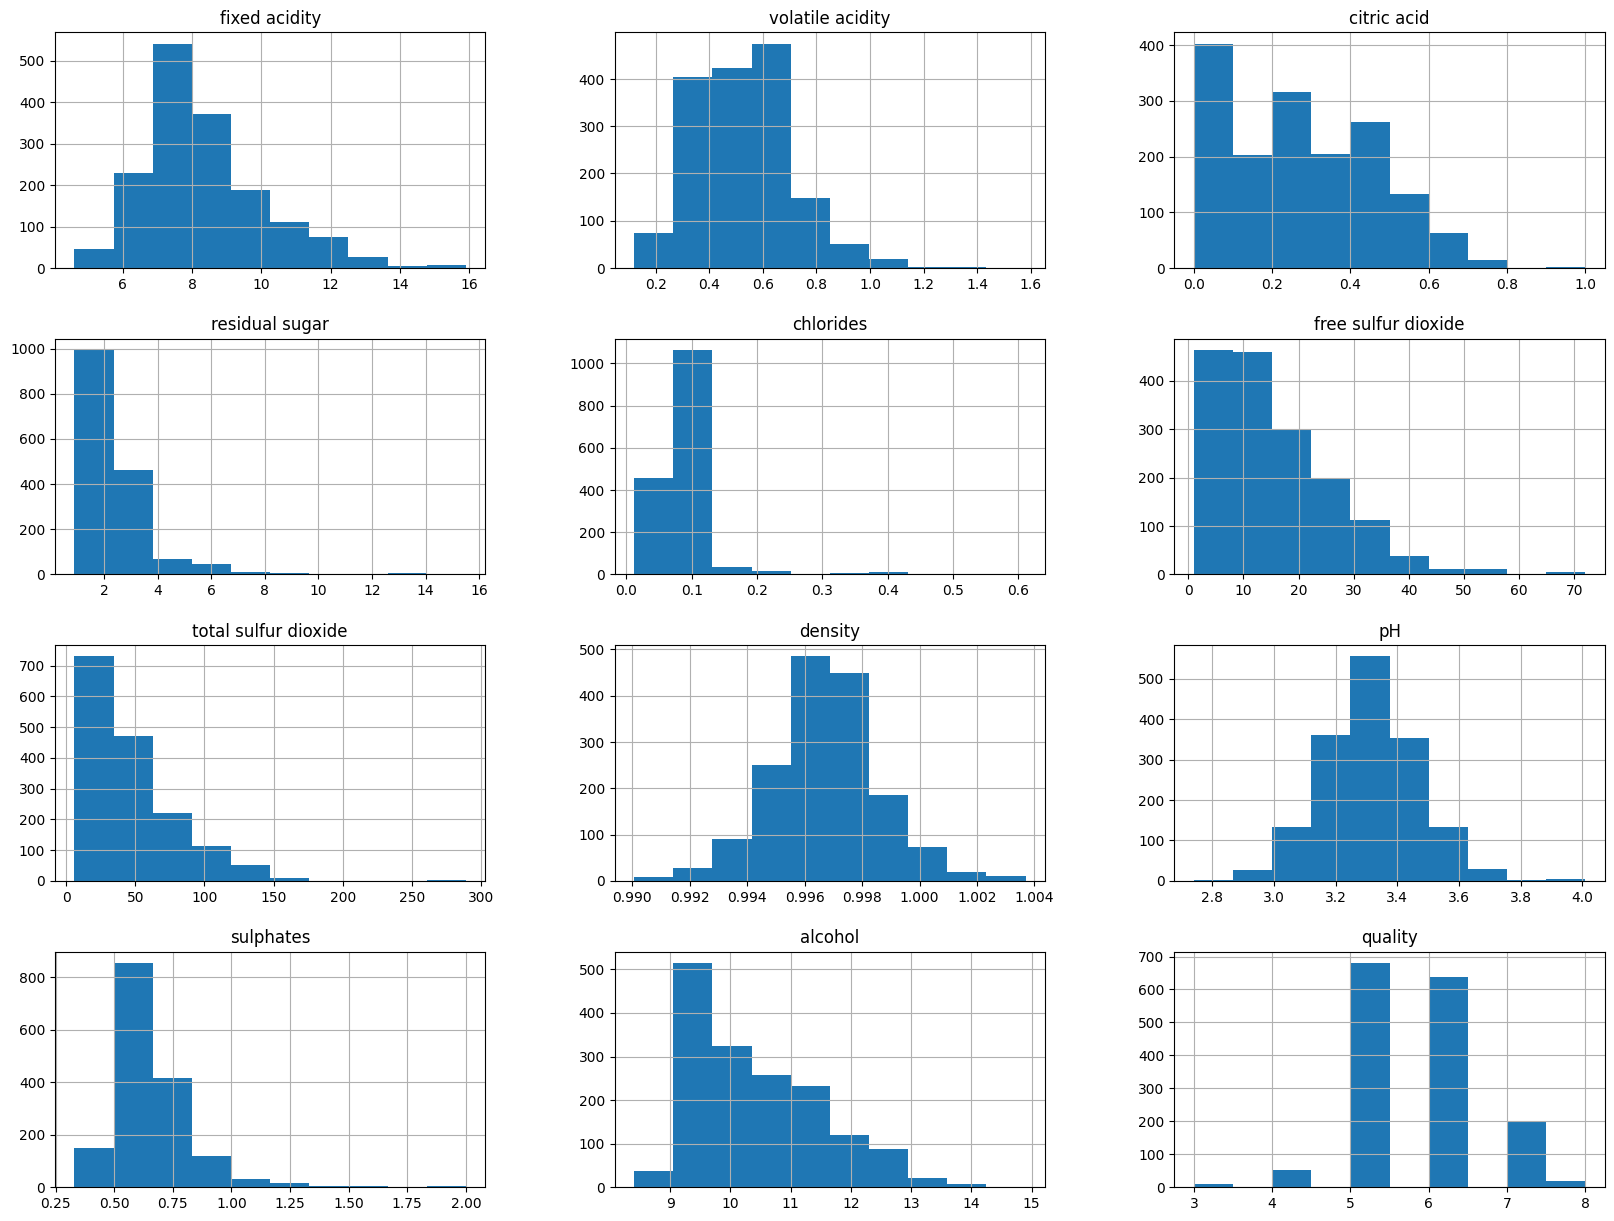

In [ ]:
freqgraph = data.select_dtypes(include=['int32','int64','float'])
freqgraph.hist(figsize =(20,15))
plt.show()

Text(0.5, 1.0, 'Box plot of fixed acidity')

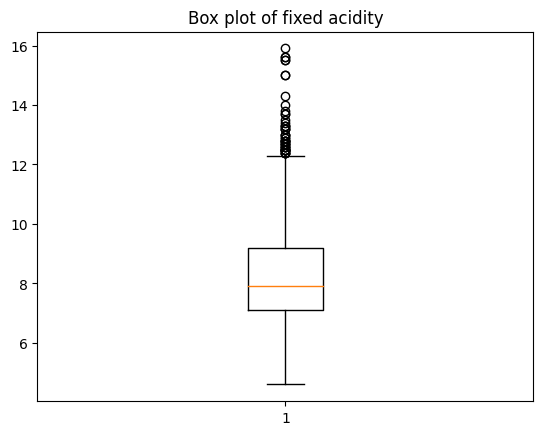

In [ ]:
plt.boxplot(data['fixed acidity'])
plt.title('Box plot of fixed acidity')

In [ ]:
q1=np.percentile(data['fixed acidity'],25,interpolation='midpoint')
q2=np.percentile(data['fixed acidity'],50,interpolation='midpoint')
q3=np.percentile(data['fixed acidity'],75,interpolation='midpoint')



print(q1)
print(q2)
print(q3)

7.1
7.9
9.2


<ipython-input-84-e5678b4cbab2>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1=np.percentile(data['fixed acidity'],25,interpolation='midpoint')
<ipython-input-84-e5678b4cbab2>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q2=np.percentile(data['fixed acidity'],50,interpolation='midpoint')
<ipython-input-84-e5678b4cbab2>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q3=np.

In [ ]:
data['fixed acidity'].median()

7.9

In [ ]:
iqr= q3-q1

lower=q1-1.5*iqr
upper =q3+1.5*iqr

print(lower)
print(upper)

3.95
12.349999999999998


In [ ]:
outlier =[]
for x in data ['fixed acidity']:
  if((x>upper) or (x<lower)):
    outlier.append(x)

outlier

[12.8,
 12.8,
 15.0,
 15.0,
 12.5,
 13.3,
 13.4,
 12.4,
 12.5,
 13.8,
 13.5,
 12.6,
 12.5,
 12.8,
 12.8,
 14.0,
 13.7,
 13.7,
 12.7,
 12.5,
 12.8,
 12.6,
 15.6,
 12.5,
 13.0,
 12.5,
 13.3,
 12.4,
 12.5,
 12.9,
 14.3,
 12.4,
 15.5,
 15.5,
 15.6,
 13.0,
 12.7,
 13.0,
 12.7,
 12.4,
 12.7,
 13.2,
 13.2,
 13.2,
 15.9,
 13.3,
 12.9,
 12.6,
 12.6]

In [ ]:


ind1 = data['fixed acidity']>upper
data.loc[ind1].index

Int64Index([ 205,  206,  243,  244,  264,  294,  328,  338,  339,  347,  353,
             359,  363,  364,  366,  374,  381,  391,  394,  409,  429,  440,
             442,  446,  470,  472,  509,  510,  516,  538,  544,  548,  554,
             555,  557,  559,  560,  564,  565,  596,  599,  601,  603,  611,
             652,  680,  811,  814, 1224],
           dtype='int64')

In [ ]:
data.drop([ 205,  206,  243,  244,  264,  294,  328,  338,  339,  347,  353,
             359,  363,  364,  366,  374,  381,  391,  394,  409,  429,  440,
             442,  446,  470,  472,  509,  510,  516,  538,  544,  548,  554,
             555,  557,  559,  560,  564,  565,  596,  599,  601,  603,  611,
             652,  680,  811,  814, 1224],inplace =True)

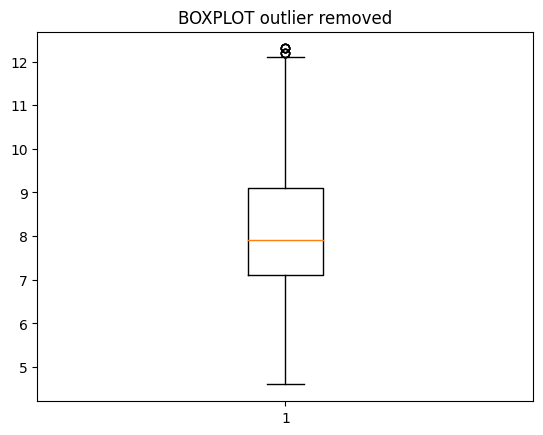

In [ ]:
plt.boxplot(data['fixed acidity'])
plt.title('BOXPLOT outlier removed')
plt.show()

In [ ]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Text(0.5, 1.0, 'Box plot of volatile acidity')

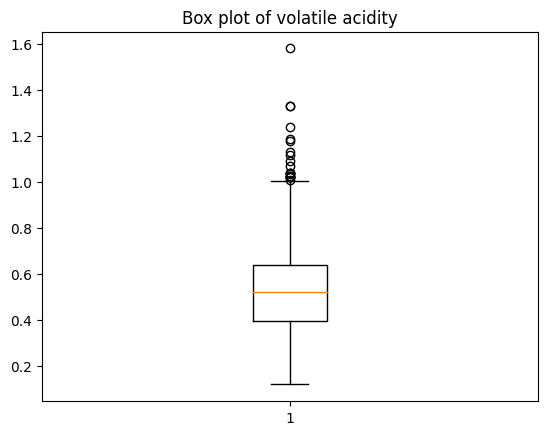

In [ ]:
plt.boxplot(data['volatile acidity'])
plt.title('Box plot of volatile acidity')

In [ ]:
q1=np.percentile(data['volatile acidity'],25,interpolation='midpoint')
q2=np.percentile(data['volatile acidity'],50,interpolation='midpoint')
q3=np.percentile(data['volatile acidity'],75,interpolation='midpoint')



print(q1)
print(q2)
print(q3)

0.395
0.52
0.64


<ipython-input-93-055f235a04c9>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1=np.percentile(data['volatile acidity'],25,interpolation='midpoint')
<ipython-input-93-055f235a04c9>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q2=np.percentile(data['volatile acidity'],50,interpolation='midpoint')
<ipython-input-93-055f235a04c9>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  

In [ ]:
data['volatile acidity'].median()

0.52

In [ ]:
iqr= q3-q1

lower=q1-1.5*iqr
upper =q3+1.5*iqr

print(lower)
print(upper)

0.027500000000000024
1.0075


In [ ]:
outlier =[]
for x in data ['volatile acidity']:
  if((x>upper) or (x<lower)):
    outlier.append(x)

outlier

[1.13,
 1.02,
 1.07,
 1.33,
 1.33,
 1.04,
 1.09,
 1.04,
 1.24,
 1.185,
 1.02,
 1.035,
 1.025,
 1.115,
 1.01,
 1.02,
 1.02,
 1.58,
 1.18,
 1.04]

In [ ]:
ind1 = data['volatile acidity']>upper
data.loc[ind1].index

Int64Index([  38,   94,  120,  126,  127,  134,  199,  553,  672,  690,  700,
             705,  710,  724,  861,  899, 1261, 1299, 1312, 1467],
           dtype='int64')

In [ ]:
data.drop([  38,   94,  120,  126,  127,  134,  199,  553,  672,  690,  700,
             705,  710,  724,  861,  899, 1012, 1261, 1299, 1312, 1467],inplace =True)

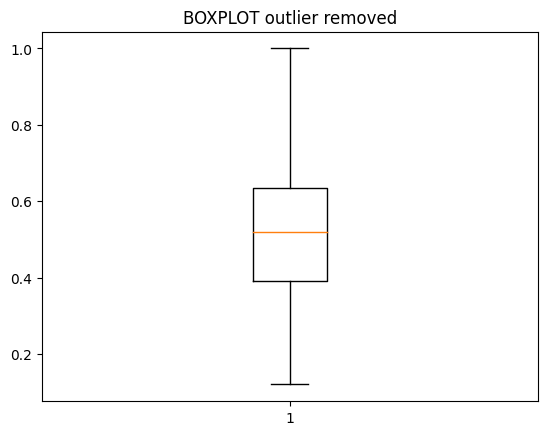

In [ ]:
plt.boxplot(data['volatile acidity'])
plt.title('BOXPLOT outlier removed')
plt.show()

Text(0.5, 1.0, 'Box plot of citric acid')

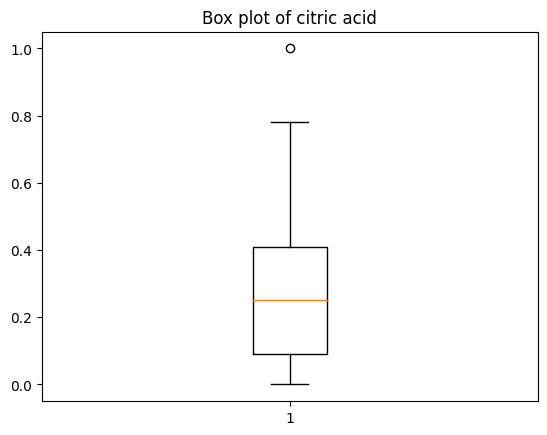

In [ ]:
plt.boxplot(data['citric acid'])
plt.title('Box plot of citric acid')

In [ ]:
q1=np.percentile(data['citric acid'],25,interpolation='midpoint')
q2=np.percentile(data['citric acid'],50,interpolation='midpoint')
q3=np.percentile(data['citric acid'],75,interpolation='midpoint')
print(q1)
print(q2)
print(q3)

0.09
0.25
0.41


<ipython-input-101-f36e15487807>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1=np.percentile(data['citric acid'],25,interpolation='midpoint')
<ipython-input-101-f36e15487807>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q2=np.percentile(data['citric acid'],50,interpolation='midpoint')
<ipython-input-101-f36e15487807>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q3=np.p

In [ ]:
data['citric acid'].median()

0.25

In [ ]:
iqr= q3-q1

lower=q1-1.5*iqr
upper =q3+1.5*iqr

print(lower)
print(upper)

-0.3899999999999999
0.8899999999999999


In [ ]:
outlier =[]
for x in data ['citric acid']:
  if((x>upper) or (x<lower)):
    outlier.append(x)

outlier

[1.0]

In [ ]:
ind1 = data['citric acid']>upper
data.loc[ind1].index

Int64Index([151], dtype='int64')

In [ ]:
data.drop([151],inplace =True)

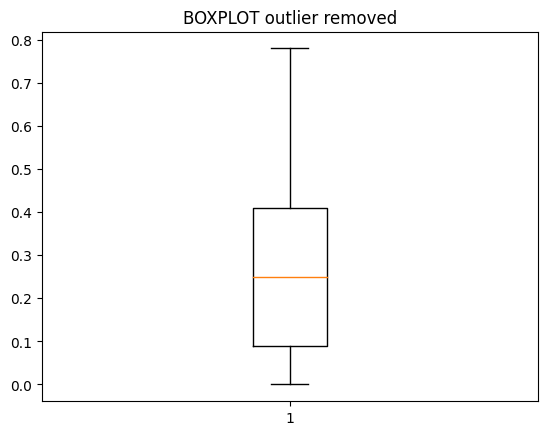

In [ ]:
plt.boxplot(data['citric acid'])
plt.title('BOXPLOT outlier removed')
plt.show()

Text(0.5, 1.0, 'Box plot ofresidual sugar')

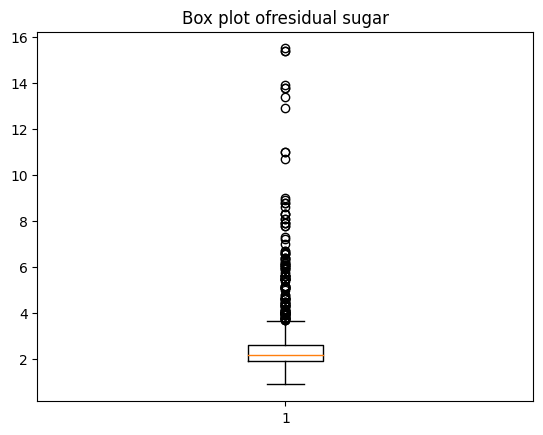

In [ ]:
plt.boxplot(data['residual sugar'])
plt.title('Box plot ofresidual sugar')

In [ ]:
q1=np.percentile(data['residual sugar'],25,interpolation='midpoint')
q2=np.percentile(data['residual sugar'],50,interpolation='midpoint')
q3=np.percentile(data['residual sugar'],75,interpolation='midpoint')
print(q1)
print(q2)
print(q3)

1.9
2.2
2.6


<ipython-input-109-292668005cbe>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1=np.percentile(data['residual sugar'],25,interpolation='midpoint')
<ipython-input-109-292668005cbe>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q2=np.percentile(data['residual sugar'],50,interpolation='midpoint')
<ipython-input-109-292668005cbe>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q

In [ ]:
data['residual sugar'].median()

2.2

In [ ]:
iqr= q3-q1

lower=q1-1.5*iqr
upper =q3+1.5*iqr

print(lower)
print(upper)

0.8499999999999996
3.6500000000000004


In [ ]:
outlier =[]
for x in data ['residual sugar']:
  if((x>upper) or (x<lower)):
    outlier.append(x)

outlier

[6.1,
 6.1,
 3.8,
 3.9,
 4.4,
 10.7,
 5.5,
 5.9,
 5.9,
 3.8,
 5.1,
 4.65,
 4.65,
 5.5,
 5.5,
 5.5,
 5.5,
 7.3,
 7.2,
 3.8,
 5.6,
 4.0,
 4.0,
 4.0,
 4.0,
 7.0,
 4.0,
 4.0,
 6.4,
 5.6,
 5.6,
 11.0,
 11.0,
 4.5,
 4.4,
 6.2,
 4.2,
 7.9,
 7.9,
 3.7,
 6.7,
 6.6,
 5.2,
 15.5,
 4.1,
 8.3,
 6.55,
 6.55,
 6.1,
 5.15,
 6.3,
 4.6,
 4.6,
 7.9,
 4.6,
 5.1,
 5.6,
 5.6,
 6.0,
 8.6,
 4.4,
 3.9,
 4.2,
 4.0,
 4.0,
 4.0,
 6.6,
 6.0,
 6.0,
 3.8,
 9.0,
 4.6,
 8.8,
 8.8,
 5.0,
 3.8,
 4.1,
 5.9,
 4.1,
 6.2,
 8.9,
 4.0,
 3.9,
 4.0,
 8.1,
 8.1,
 6.4,
 6.4,
 8.3,
 8.3,
 4.7,
 5.5,
 5.5,
 4.3,
 5.5,
 3.7,
 6.2,
 5.6,
 7.8,
 4.6,
 5.8,
 4.1,
 12.9,
 4.3,
 13.4,
 4.8,
 6.3,
 4.5,
 4.5,
 4.3,
 4.3,
 3.9,
 3.8,
 5.4,
 3.8,
 6.1,
 3.9,
 5.1,
 5.1,
 3.9,
 15.4,
 15.4,
 4.8,
 5.2,
 5.2,
 3.75,
 13.8,
 13.8,
 5.7,
 4.3,
 4.1,
 4.1,
 4.4,
 3.7,
 6.7,
 13.9,
 5.1,
 7.8]

In [ ]:
ind1 = data['residual sugar']>upper
data.loc[ind1].index

Int64Index([   9,   11,   14,   15,   18,   33,   35,   39,   40,   55,
            ...
            1478, 1501, 1514, 1515, 1540, 1552, 1558, 1574, 1577, 1589],
           dtype='int64', length=138)

In [ ]:
data.drop([   9,   11,   14,   15,   18,   33,   35,   39,   40,   55,
            1478, 1501, 1514, 1515, 1540, 1552, 1558, 1574, 1577, 1589],inplace =True)

In [ ]:
z=data.loc[ind1].index
z

Int64Index([396, 400, 1358, 1434, 1435, 1474, 1476], dtype='int64')

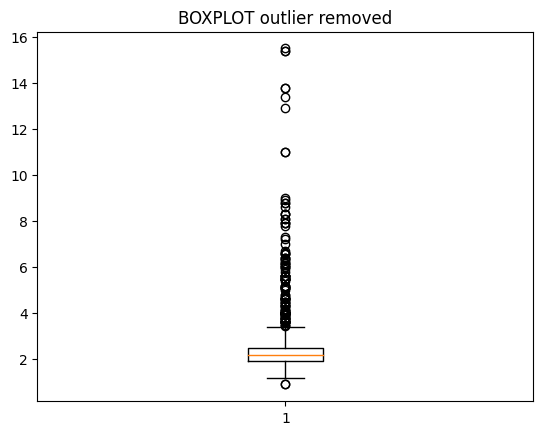

In [ ]:
plt.boxplot(data['residual sugar'])
plt.title('BOXPLOT outlier removed')
plt.show()

In [ ]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

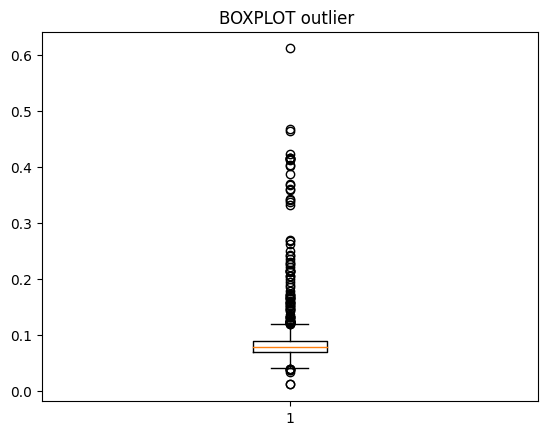

In [ ]:
plt.boxplot(data['chlorides'])
plt.title('BOXPLOT outlier ')
plt.show()

In [ ]:
q1=np.percentile(data['chlorides'],25,interpolation='midpoint')
q2=np.percentile(data['chlorides'],50,interpolation='midpoint')
q3=np.percentile(data['chlorides'],75,interpolation='midpoint')
print(q1)
print(q2)
print(q3)

0.07
0.079
0.09


<ipython-input-118-ed6156ae2e01>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1=np.percentile(data['chlorides'],25,interpolation='midpoint')
<ipython-input-118-ed6156ae2e01>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q2=np.percentile(data['chlorides'],50,interpolation='midpoint')
<ipython-input-118-ed6156ae2e01>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q3=np.perce

In [ ]:
data['chlorides'].median()

0.079

In [ ]:
iqr= q3-q1

lower=q1-1.5*iqr
upper =q3+1.5*iqr

print(lower)
print(upper)

0.04000000000000002
0.11999999999999998


In [ ]:
outlier =[]
for x in data ['chlorides']:
  if((x>upper) or (x<lower)):
    outlier.append(x)

outlier

[0.368,
 0.341,
 0.332,
 0.4639999999999999,
 0.401,
 0.467,
 0.122,
 0.146,
 0.236,
 0.36,
 0.27,
 0.039,
 0.337,
 0.263,
 0.611,
 0.358,
 0.3429999999999999,
 0.186,
 0.213,
 0.214,
 0.121,
 0.122,
 0.122,
 0.128,
 0.159,
 0.124,
 0.122,
 0.122,
 0.174,
 0.121,
 0.127,
 0.413,
 0.152,
 0.152,
 0.125,
 0.122,
 0.2,
 0.171,
 0.226,
 0.226,
 0.25,
 0.148,
 0.122,
 0.124,
 0.124,
 0.143,
 0.222,
 0.039,
 0.157,
 0.422,
 0.034,
 0.387,
 0.415,
 0.157,
 0.157,
 0.243,
 0.241,
 0.19,
 0.132,
 0.126,
 0.038,
 0.165,
 0.145,
 0.147,
 0.012,
 0.012,
 0.1939999999999999,
 0.132,
 0.161,
 0.12,
 0.12,
 0.123,
 0.123,
 0.414,
 0.216,
 0.171,
 0.178,
 0.369,
 0.166,
 0.166,
 0.136,
 0.132,
 0.132,
 0.123,
 0.123,
 0.123,
 0.4029999999999999,
 0.414,
 0.166,
 0.168,
 0.415,
 0.153,
 0.415,
 0.267,
 0.123,
 0.214,
 0.214,
 0.1689999999999999,
 0.205,
 0.205,
 0.039,
 0.23,
 0.038]

In [ ]:
ind1 = data['chlorides']>upper
data.loc[ind1].index

Int64Index([  17,   19,   42,   81,   83,  106,  109,  125,  147,  169,  181,
             226,  240,  258,  281,  291,  303,  307,  308,  326,  330,  331,
             335,  368,  375,  396,  400,  408,  418,  447,  451,  482,  483,
             512,  515,  517,  549,  566,  567,  568,  614,  618,  624,  625,
             638,  666,  689,  692,  730,  754,  773,  774,  776,  777,  780,
             795,  796,  808,  832,  833,  882,  910,  916,  958, 1014, 1020,
            1021, 1051, 1098, 1109, 1146, 1165, 1191, 1193, 1207, 1220, 1221,
            1252, 1258, 1259, 1260, 1319, 1334, 1358, 1370, 1371, 1372, 1374,
            1423, 1434, 1435, 1436, 1474, 1476, 1570],
           dtype='int64')

In [ ]:
data.drop([  13,   46,   61,  118,  121,  130,  145,  342,  343,  357,  415,
             484,  556,  558,  645,  781,  783,  803,  841,  842,  911,  962,
            1009, 1094, 1096, 1152, 1155, 1194, 1277, 1365, 1482, 1518, 1578],inplace =True)

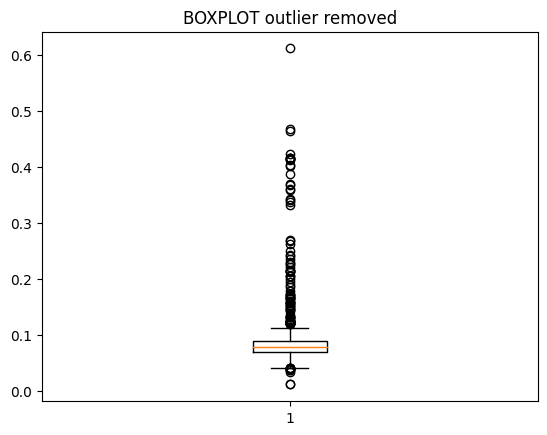

In [ ]:
plt.boxplot(data['chlorides'])
plt.title('BOXPLOT outlier removed')
plt.show()

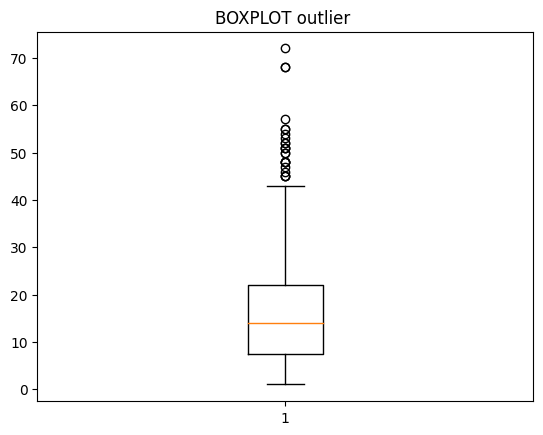

In [ ]:
plt.boxplot(data['free sulfur dioxide'])
plt.title('BOXPLOT outlier ')
plt.show()

In [ ]:
q1=np.percentile(data['free sulfur dioxide'],25,interpolation='midpoint')
q2=np.percentile(data['free sulfur dioxide'],50,interpolation='midpoint')
q3=np.percentile(data['free sulfur dioxide'],75,interpolation='midpoint')
print(q1)
print(q2)
print(q3)

7.5
14.0
22.0


<ipython-input-126-6fe5bb4bb5de>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1=np.percentile(data['free sulfur dioxide'],25,interpolation='midpoint')
<ipython-input-126-6fe5bb4bb5de>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q2=np.percentile(data['free sulfur dioxide'],50,interpolation='midpoint')
<ipython-input-126-6fe5bb4bb5de>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy

In [ ]:
data['free sulfur dioxide'].median()

14.0

In [ ]:
iqr= q3-q1

lower=q1-1.5*iqr
upper =q3+1.5*iqr

print(lower)
print(upper)

-14.25
43.75


In [ ]:
outlier =[]
for x in data ['free sulfur dioxide']:
  if((x>upper) or (x<lower)):
    outlier.append(x)

outlier

[50.0,
 68.0,
 68.0,
 47.0,
 54.0,
 46.0,
 45.0,
 53.0,
 52.0,
 51.0,
 45.0,
 57.0,
 50.0,
 45.0,
 48.0,
 48.0,
 72.0,
 51.0,
 51.0,
 52.0,
 55.0,
 55.0,
 48.0,
 48.0]

In [ ]:
ind1 = data['free sulfur dioxide']>upper
data.loc[ind1].index

Int64Index([  57,  396,  400,  522,  584,  634,  678,  925,  926,  982, 1075,
            1131, 1154, 1156, 1175, 1231, 1244, 1295, 1296, 1358, 1434, 1435,
            1474, 1476],
           dtype='int64')

In [ ]:
data.drop([  57,  522,  584,  634,  678,  925,  926,  982, 1075, 1131, 1154,
            1156, 1175, 1231, 1244, 1295, 1296],inplace =True)

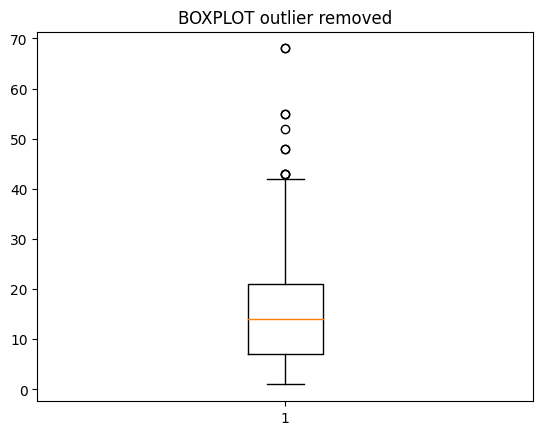

In [ ]:
plt.boxplot(data['free sulfur dioxide'])
plt.title('BOXPLOT outlier removed')
plt.show()

<Axes: >

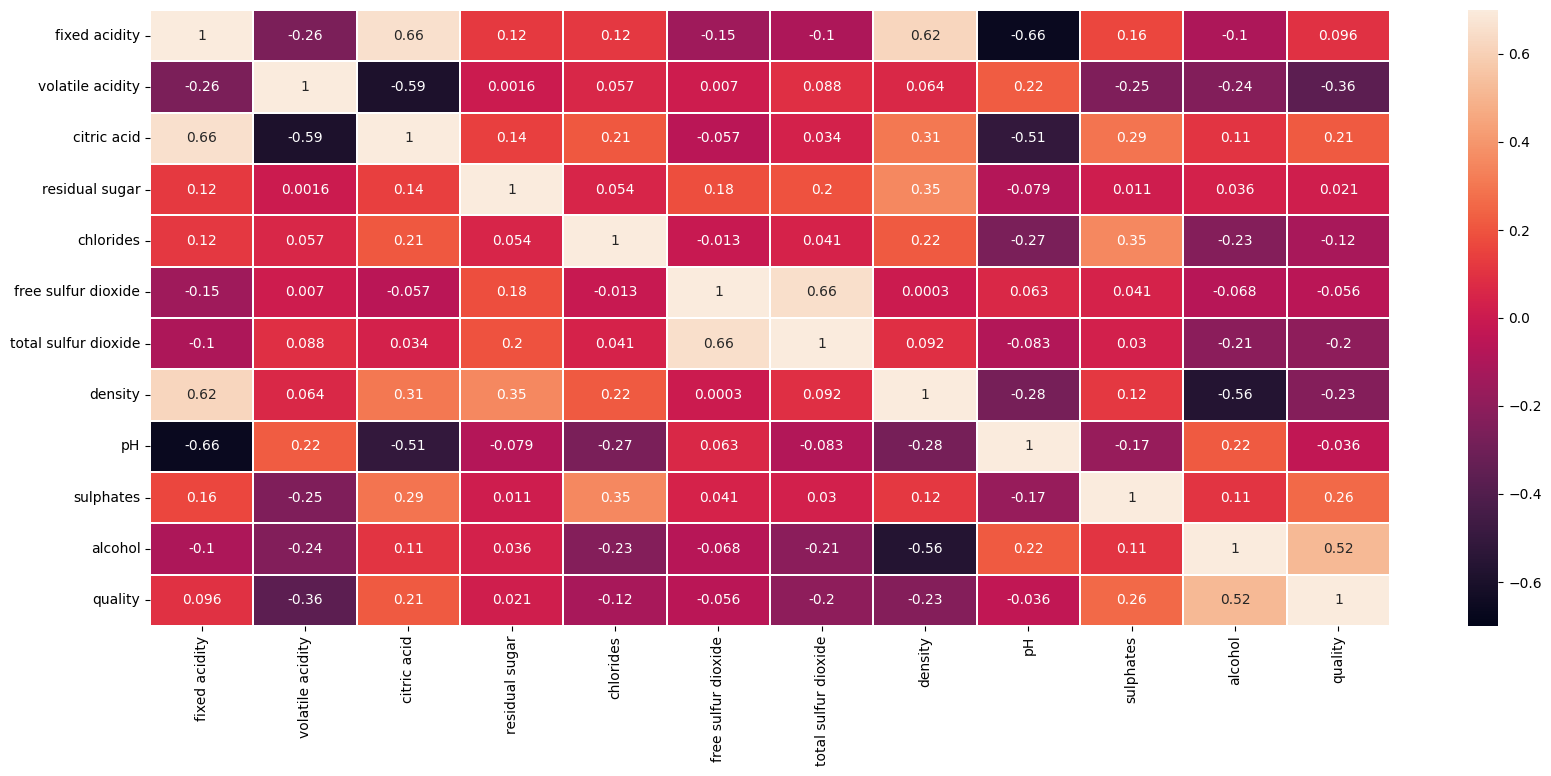

In [ ]:
corrmatrix = data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin = -.7,vmax=0.7,annot=True,linewidths=0.2)

In [ ]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
data1=data.drop(['fixed acidity','density','free sulfur dioxide'],axis=1)
data1.columns

Index(['volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'total sulfur dioxide', 'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
y=data1['quality']
x=data1.drop(['quality'],axis=1)

In [ ]:
x.shape

(1590, 8)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [ ]:
from sklearn import linear_model
lr= linear_model.LinearRegression()

In [ ]:
model = lr.fit(x_train,y_train)

In [ ]:
predictions = model.predict(x_test)

In [ ]:
print(y_test)

1088    7
407     7
1502    5
239     6
617     6
       ..
322     5
1328    5
499     6
937     4
1294    6
Name: quality, Length: 398, dtype: int64


In [ ]:
print(predictions)

[5.79393148 5.91930765 5.30327956 4.72166028 6.09810129 5.20998685
 5.76592698 5.28677517 5.89717902 5.73375858 6.25090054 6.19916436
 5.04969894 5.22830508 5.9138559  6.12634469 5.22305733 6.62852951
 5.93485297 6.48752588 5.66475638 6.242748   5.97781036 5.36058282
 5.38226695 5.70922516 5.61143216 6.28757183 5.73375858 5.37724947
 5.1633202  5.87060458 6.10992936 5.27991308 5.29286614 6.57735995
 6.43998007 5.3581781  5.67262269 5.8623009  5.7900669  5.32464842
 6.35569783 5.27145236 5.70990561 4.98525645 5.90370284 5.88960191
 5.48613108 5.1394131  6.24722798 5.4076885  5.71771642 5.7341476
 5.1128744  5.37897067 6.06290781 5.0923788  5.21970535 4.95593706
 5.45862085 5.36466606 5.75730143 5.50262053 5.77442081 5.09634585
 5.86498641 5.16700959 6.38607619 5.31241793 5.5401346  5.08445032
 5.55456367 5.48265311 5.13243451 5.64133033 6.38546965 5.27191475
 5.74698951 5.16035096 5.88083204 6.41769727 5.1609626  5.21358735
 5.28990724 5.3957092  5.43547058 5.16373794 6.07642209 5.03705

In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE is:',mean_squared_error(y_test,predictions))

MSE is: 0.3891025192103126
